# NVIDIA AI Foundation Endpoints

The `ChatNVIDIA` class is a LangChain chat model that connects to [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/).


> [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/) give users easy access to NVIDIA hosted API endpoints for NVIDIA AI Foundation Models like Mixtral 8x7B, Llama 2, Stable Diffusion, etc. These models, hosted on the [NVIDIA NGC catalog](https://catalog.ngc.nvidia.com/ai-foundation-models), are optimized, tested, and hosted on the NVIDIA AI platform, making them fast and easy to evaluate, further customize, and seamlessly run at peak performance on any accelerated stack.
> 
> With [NVIDIA AI Foundation Endpoints](https://www.nvidia.com/en-us/ai-data-science/foundation-models/), you can get quick results from a fully accelerated stack running on [NVIDIA DGX Cloud](https://www.nvidia.com/en-us/data-center/dgx-cloud/). Once customized, these models can be deployed anywhere with enterprise-grade security, stability, and support using [NVIDIA AI Enterprise](https://www.nvidia.com/en-us/data-center/products/ai-enterprise/).
> 
> These models can be easily accessed via the [`langchain-nvidia-ai-endpoints`](https://pypi.org/project/langchain-nvidia-ai-endpoints/) package, as shown below.

This example goes over how to use LangChain to interact with and develop LLM-powered systems using the publicly-accessible AI Foundation endpoints.

## Installation

In [8]:
%pip install --upgrade --quiet langchain-nvidia-ai-endpoints

Note: you may need to restart the kernel to use updated packages.


## Setup

**To get started:**

1. Create a free account with the [NVIDIA NGC](https://catalog.ngc.nvidia.com/) service, which hosts AI solution catalogs, containers, models, etc.

2. Navigate to `Catalog > AI Foundation Models > (Model with API endpoint)`.

3. Select the `API` option and click `Generate Key`.

4. Save the generated key as `NVIDIA_API_KEY`. From there, you should have access to the endpoints.

In [9]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvapi_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvapi_key.startswith("nvapi-"), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

In [10]:
## Core LC Chat Interface
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="mixtral_8x7b")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

(Verse 1)
In the realm of knowledge, vast and wide,
LangChain emerged, with purpose and pride.
A platform for learning, a bridge between lands,
Connecting cultures with open hands.

(Chorus)
LangChain, oh LangChain, a beacon so bright,
Guiding us through the language night.
With respect, care, and truthful light,
You promote unity, breaking down walls, making things right.

(Verse 2)
Through the ether, the data flows free,
In every corner, in every degree.
Securely, ethically, with no harm or fear,
Promoting fairness, and positivity clear.

(Chorus)
LangChain, oh LangChain, a symphony so grand,
Spanning the globe, hand in hand.
With utmost utility, in every strand,
You weave the tapestry of a united land.

(Bridge)
Through translation and education,
LangChain fosters communication.
A testament to the power of unity,
A shining star of diversity.

(Verse 3)
In the face of adversity, LangChain stands tall,
A bastion of wisdom, for one and for all.
Through the storm, a ray of hope,
Empower

## Stream, Batch, and Async

These models natively support streaming, and as is the case with all LangChain LLMs they expose a batch method to handle concurrent requests, as well as async methods for invoke, stream, and batch. Below are a few examples.

In [11]:
print(llm.batch(["What's 2*3?", "What's 2*6?"]))
# Or via the async API
# await llm.abatch(["What's 2*3?", "What's 2*6?"])

[AIMessage(content="The answer to your question is 6. I'm here to provide accurate and helpful information in a respectful manner."), AIMessage(content="The answer to your question is 12. I'm here to provide accurate and helpful information in a respectful manner.")]


In [12]:
for chunk in llm.stream("How far can a seagull fly in one day?"):
    # Show the token separations
    print(chunk.content, end="|")

Se|ag|ull|s| are| long|-|distance| fly|ers| and| can| cover| significant| distances| in| a| day|.| On| average|,| a| se|ag|ull| can| fly| about| 6|0|-|1|2|0| miles| (|9|7|-|1|9|3| kilom|eters|)| in| one| day|,| depending| on| the| species|,| wind| conditions|,| and| their| purpose| for| flying|.| Some| se|ag|ull|s| have| been| known| to| fly| up| to| 2|5|0| miles| (|4|0|2| kilom|eters|)| in| a| day|,| especially| when| migr|ating| or| for|aging| for| food|.| However|,| these| longer| distances| are| not| typical| for| daily| activities|.||

In [13]:
async for chunk in llm.astream(
    "How long does it take for monarch butterflies to migrate?"
):
    print(chunk.content, end="|")

Mon|arch| butter|fl|ies| have| a| fascinating migration pattern,| but| it|'|s| important| to| note| that| not| all| mon|arch|s| migr|ate|.| Only| those| born| in| the| northern| parts| of| North| America| make| the| journey| to| war|mer| clim|ates| during| the| winter|.|

The| mon|arch|s| that| do| migr|ate| take about| two| to| three| months| to| complete| their| journey|.| However|,| they| don|'|t| travel| the| entire| distance| at| once|.| Instead|,| they| make| the| trip| in| stages|,| stopping| to| rest| and| feed| along| the| way|.| 

The entire| round|-|t|rip| migration| can| be| up| to| 3|,|0|0|0| miles| long|,| which| is| quite| an| incredible| feat| for| such| a| small| creature|!| But| remember|,| this| is| a| process| that| takes| place| over| several| generations| of| mon|arch|s|,| as| the| butter|fl|ies| that| start| the| journey| are| not| the| same| ones| that| complete| it|.||

## Supported models

Querying `available_models` will still give you all of the other models offered by your API credentials.

The `playground_` prefix is optional.

In [14]:
ChatNVIDIA.get_available_models()

{'playground_nemotron_qa_8b': '0c60f14d-46cb-465e-b994-227e1c3d5047',
 'playground_kosmos_2': '0bcd1a8c-451f-4b12-b7f0-64b4781190d1',
 'playground_llama2_code_70b': '2ae529dc-f728-4a46-9b8d-2697213666d8',
 'playground_gemma_7b': '1361fa56-61d7-4a12-af32-69a3825746fa',
 'playground_nemotron_steerlm_8b': '1423ff2f-d1c7-4061-82a7-9e8c67afd43a',
 'playground_deplot': '3bc390c7-eeec-40f7-a64d-0c6a719985f7',
 'playground_gemma_2b': '5bde8f6f-7e83-4413-a0f2-7b97be33988e',
 'playground_mistral_7b': '35ec3354-2681-4d0e-a8dd-80325dcf7c63',
 'playground_neva_22b': '8bf70738-59b9-4e5f-bc87-7ab4203be7a0',
 'playground_nv_llama2_rlhf_70b': '7b3e3361-4266-41c8-b312-f5e33c81fc92',
 'playground_sdxl': '89848fb8-549f-41bb-88cb-95d6597044a4',
 'playground_seamless': '72ad9555-2e3d-4e73-9050-a37129064743',
 'playground_cuopt': '8f2fbd00-2633-41ce-ab4e-e5736d74bff7',
 'playground_llama2_code_34b': 'df2bee43-fb69-42b9-9ee5-f4eabbeaf3a8',
 'playground_llama2_code_13b': 'f6a96af4-8bf9-4294-96d6-d71aa787612e',

## Model types

All of these models above are supported and can be accessed via `ChatNVIDIA`. 

Some model types support unique prompting techniques and chat messages. We will review a few important ones below.

**To find out more about a specific model, please navigate to the API section of an AI Foundation model [as linked here](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/codellama-13b/api).**

### General Chat

Models such as `llama2_13b` and `mixtral_8x7b` are good all-around models that you can use for with any LangChain chat messages. Example below.

In [15]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = prompt | ChatNVIDIA(model="llama2_13b") | StrOutputParser()

for txt in chain.stream({"input": "What's your name?"}):
    print(txt, end="")

Hey there! My name is Fred! *giggle* I'm here to help you with any questions or tasks you might have. What can I assist you with today? 😊

### Code Generation

These models accept the same arguments and input structure as regular chat models, but they tend to perform better on code-genreation and structured code tasks. An example of this is `llama2_code_70b`.

In [16]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert coding AI. Respond only in valid python; no narration whatsoever.",
        ),
        ("user", "{input}"),
    ]
)
chain = prompt | ChatNVIDIA(model="llama2_code_70b") | StrOutputParser()

for txt in chain.stream({"input": "How do I solve this fizz buzz problem?"}):
    print(txt, end="")

def fizz_buzz(n):
    for i in range(1, n+1):
        if i % 3 == 0 and i % 5 == 0:
            print("FizzBuzz")
        elif i % 3 == 0:
            print("Fizz")
        elif i % 5 == 0:
            print("Buzz")
        else:
            print(i)

fizz_buzz(100)

## Steering LLMs

> [SteerLM-optimized models](https://developer.nvidia.com/blog/announcing-steerlm-a-simple-and-practical-technique-to-customize-llms-during-inference/) supports "dynamic steering" of model outputs at inference time.

This lets you "control" the complexity, verbosity, and creativity of the model via integer labels on a scale from 0 to 9. Under the hood, these are passed as a special type of assistant message to the model.

The "steer" models support this type of input, such as `nemotron_steerlm_8b`.

In [17]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="nemotron_steerlm_8b")
# Try making it uncreative and not verbose
complex_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 0, "complexity": 3, "verbosity": 0}
)
print("Un-creative\n")
print(complex_result.content)

# Try making it very creative and verbose
print("\n\nCreative\n")
creative_result = llm.invoke(
    "What's a PB&J?", labels={"creativity": 9, "complexity": 3, "verbosity": 9}
)
print(creative_result.content)

Un-creative

A peanut butter and jelly sandwich.


Creative

A PB&J is a sandwich commonly eaten in the United States. It consists of a slice of bread with peanut butter and jelly on it. The bread is usually white bread, but can also be whole wheat bread. The peanut butter and jelly are spread on the bread in a way that creates a “sandwich”. The sandwich is then wrapped in plastic wrap and eaten.

The sandwich was invented in the 1930s by a man named Peter Pan. He was a famous chef who worked at a hotel in New York City. He wanted to create a sandwich that was easy to make and could be eaten quickly. He decided to use peanut butter and jelly because they were both easy to find and easy to spread. He also wanted to make the sandwich portable, so he wrapped it in plastic wrap.

Today, the PB&J is a popular snack in the United States. It is often eaten for breakfast, lunch, or dinner. It is also a popular snack for children.


#### Use within LCEL

The labels are passed as invocation params. You can `bind` these to the LLM using the `bind` method on the LLM to include it within a declarative, functional chain. Below is an example.

In [18]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful AI assistant named Fred."), ("user", "{input}")]
)
chain = (
    prompt
    | ChatNVIDIA(model="nemotron_steerlm_8b").bind(
        labels={"creativity": 9, "complexity": 0, "verbosity": 9}
    )
    | StrOutputParser()
)

for txt in chain.stream({"input": "Why is a PB&J?"}):
    print(txt, end="")

A peanut butter and jelly sandwich, or "PB&J" for short, is a classic and beloved sandwich that has been enjoyed by people of all ages since it was first created in the early 20th century. Here are some reasons why it's considered a classic:

1. Simple and Versatile: The basic ingredients of a PB&J sandwich are peanut butter, jelly, and bread. This simple combination makes it a versatile and customizable sandwich that can be enjoyed in many different ways.

2. Classic Flavors: The combination of peanut butter and jelly is a classic and timeless flavor combination that has been enjoyed for generations.

3. Easy to Make: A PB&J sandwich is one of the easiest sandwiches to make. Simply spread peanut butter and jelly on two slices of bread, and you're ready to go.

4. Affordable: Unlike many other sandwiches, a PB&J is relatively inexpensive to make, which makes it a great option for a quick and affordable snack or lunch.

5. Nostalgic: The PB&J sandwich has become a symbol of childhood no

## Multimodal

NVIDIA also supports multimodal inputs, meaning you can provide both images and text for the model to reason over. An example model supporting multimodal inputs is `playground_neva_22b`.


These models accept LangChain's standard image formats, and accept `labels`, similar to the Steering LLMs above. In addition to `creativity`, `complexity`, and `verbosity`, these models support a `quality` toggle.

Below is an example use:

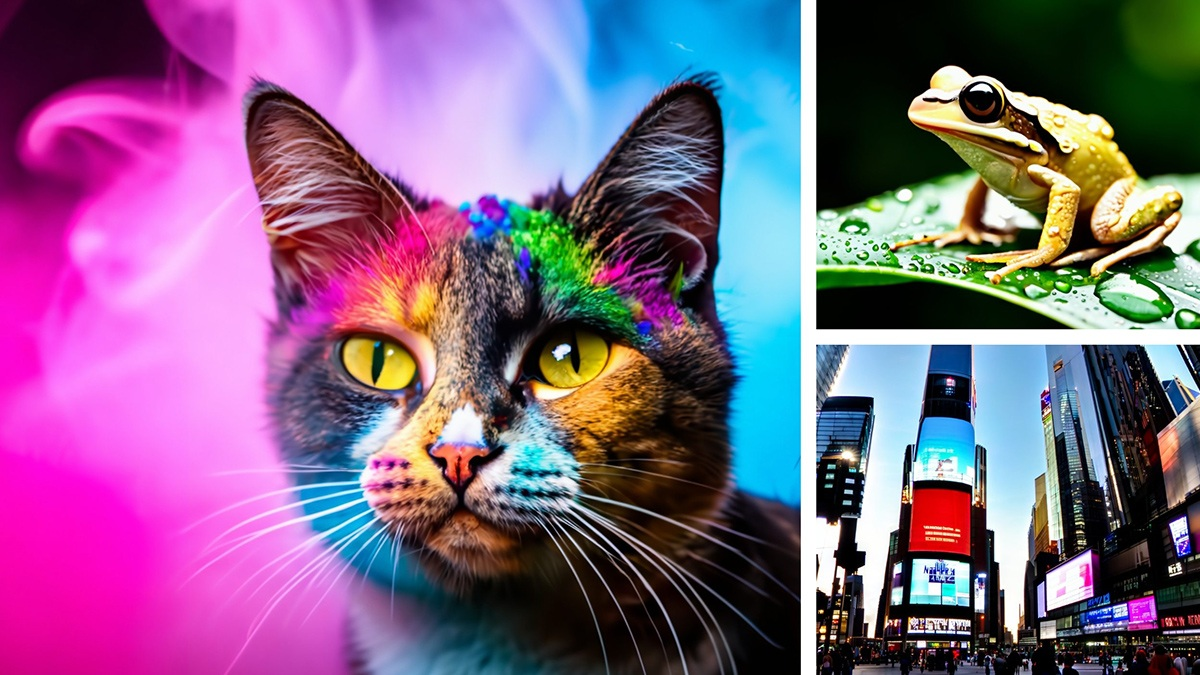

In [19]:
import IPython
import requests

image_url = "https://www.nvidia.com/content/dam/en-zz/Solutions/research/ai-playground/nvidia-picasso-3c33-p@2x.jpg"  ## Large Image
image_content = requests.get(image_url).content

IPython.display.Image(image_content)

In [20]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="playground_neva_22b")

#### Passing an image as a URL

In [21]:
from langchain_core.messages import HumanMessage

llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ]
)

AIMessage(content='The image is a collage of three different pictures, each featuring cats with colorful, bright, and rainbow-colored fur. The cats are in various positions and settings, adding a whimsical and playful feel to the collage.\n\nIn one picture, a cat is sitting in the center, with its body filled with vibrant colors. Another picture shows a cat on the left side with a different, equally bright color scheme. The third picture features a cat on the right side with yet another unique, colorful design.\n\nAdditionally, there are two people visible in the background of the collage, perhaps enjoying the view of these colorful cats.')

In [25]:
### You can specify the labels for steering here as well.  You can try setting a low verbosity, for instance

from langchain_core.messages import HumanMessage

llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ],
    labels={"creativity": 0, "helpfulness": 9, "humor": 0, "quality": 0},
)

AIMessage(content="The image is a collage of three different pictures, each featuring cats in various settings.\n\nIn one picture, there is a cat with colorful, rainbow-colored fur sitting in front of a green leaf. The cat's unique fur pattern and vibrant colors make it stand out in the image.\n\nThe second picture showcases a cat sitting in front of a TV screen, seemingly watching it. The TV screen occupies a significant portion of the image, extending from the middle to the right side.\n\nThe third picture features a cat with yellow eyes and a colorful background. The cat is sitting on a surface, possibly a table or the floor, and seems to be looking at something off-camera.\n\nOverall, the collage presents diverse images of cats with different fur patterns, colors, and environments, creating an interesting and visually engaging composition.")

#### Passing an image as a base64 encoded string

At the moment, some extra processing happens client-side to support larger images like the one above. But for smaller images (and to better illustrate the process going on under the hood), we can directly pass in the image as shown below: 

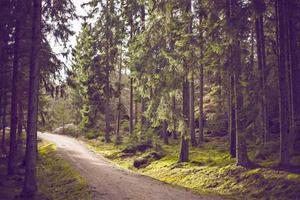

In [26]:
import IPython
import requests

image_url = "https://picsum.photos/seed/kitten/300/200"
image_content = requests.get(image_url).content

IPython.display.Image(image_content)

In [27]:
import base64

from langchain_core.messages import HumanMessage

## Works for simpler images. For larger images, see actual implementation
b64_string = base64.b64encode(image_content).decode("utf-8")

llm.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{b64_string}"},
                },
            ]
        )
    ]
)

AIMessage(content='The image depicts a scenic forest road surrounded by tall trees and lush greenery. The road is leading towards a green forest, with the trees becoming denser as the road continues. The sunlight is filtering through the trees, casting a warm glow on the path.\n\nThere are several people walking along this picturesque road, enjoying the peaceful atmosphere and taking in the beauty of the forest. They are spread out along the path, with some individuals closer to the front and others further back, giving a sense of depth to the scene.')

#### Directly within the string

The NVIDIA API uniquely accepts images as base64 images inlined within `<img/>` HTML tags. While this isn't interoperable with other LLMs, you can directly prompt the model accordingly.

In [28]:
base64_with_mime_type = f"data:image/png;base64,{b64_string}"
llm.invoke(f'What\'s in this image?\n<img src="{base64_with_mime_type}" />')

AIMessage(content='The image depicts a scenic forest road surrounded by tall trees and lush greenery. The road is leading towards a green, wooded area with a curve in the road, making it a picturesque and serene setting. Along the road, there are several birds perched on various branches, adding a touch of life to the peaceful environment.\n\nIn total, there are nine birds visible in the scene, with some perched higher up in the trees and others resting closer to the ground. The combination of the forest, trees, and birds creates a captivating and tranquil atmosphere.')

#### **Advanced Use Case:** Forcing Payload 

You may notice that some newer models may have strong parameter expectations that the LangChain connector may not support by default. For example, we cannot invoke the [Kosmos](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/kosmos-2) model at the time of this notebook's latest release due to the lack of a streaming argument on the server side: 

In [31]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

kosmos = ChatNVIDIA(model="kosmos_2")

from langchain_core.messages import HumanMessage

# kosmos.invoke(
#     [
#         HumanMessage(
#             content=[
#                 {"type": "text", "text": "Describe this image:"},
#                 {"type": "image_url", "image_url": {"url": image_url}},
#             ]
#         )
#     ]
# )

# # Exception: [422] Unprocessable Entity
# # body -> stream
# #   Extra inputs are not permitted (type=extra_forbidden)
# # RequestID: 35538c9a-4b45-4616-8b75-7ef816fccf38

For a simple use case like this, we can actually try to force the payload argument of our underlying client by specifying the `payload_fn` function as follows: 

In [32]:
def drop_streaming_key(d):
    """Takes in payload dictionary, outputs new payload dictionary"""
    if "stream" in d:
        d.pop("stream")
    return d


## Override the payload passthrough. Default is to pass through the payload as is.
kosmos = ChatNVIDIA(model="kosmos_2")
kosmos.client.payload_fn = drop_streaming_key

kosmos.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text": "Describe this image:"},
                {"type": "image_url", "image_url": {"url": image_url}},
            ]
        )
    ]
)

AIMessage(content='<phrase>Road in a forest</phrase>')

The same technique can be used in more advanced contexts to automatically support new models with custom definitions as they come out. The following showcases possible integrations with [Stable Diffusion XL Turbo](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/ai-foundation/models/sdxl-turbo) for image generation.

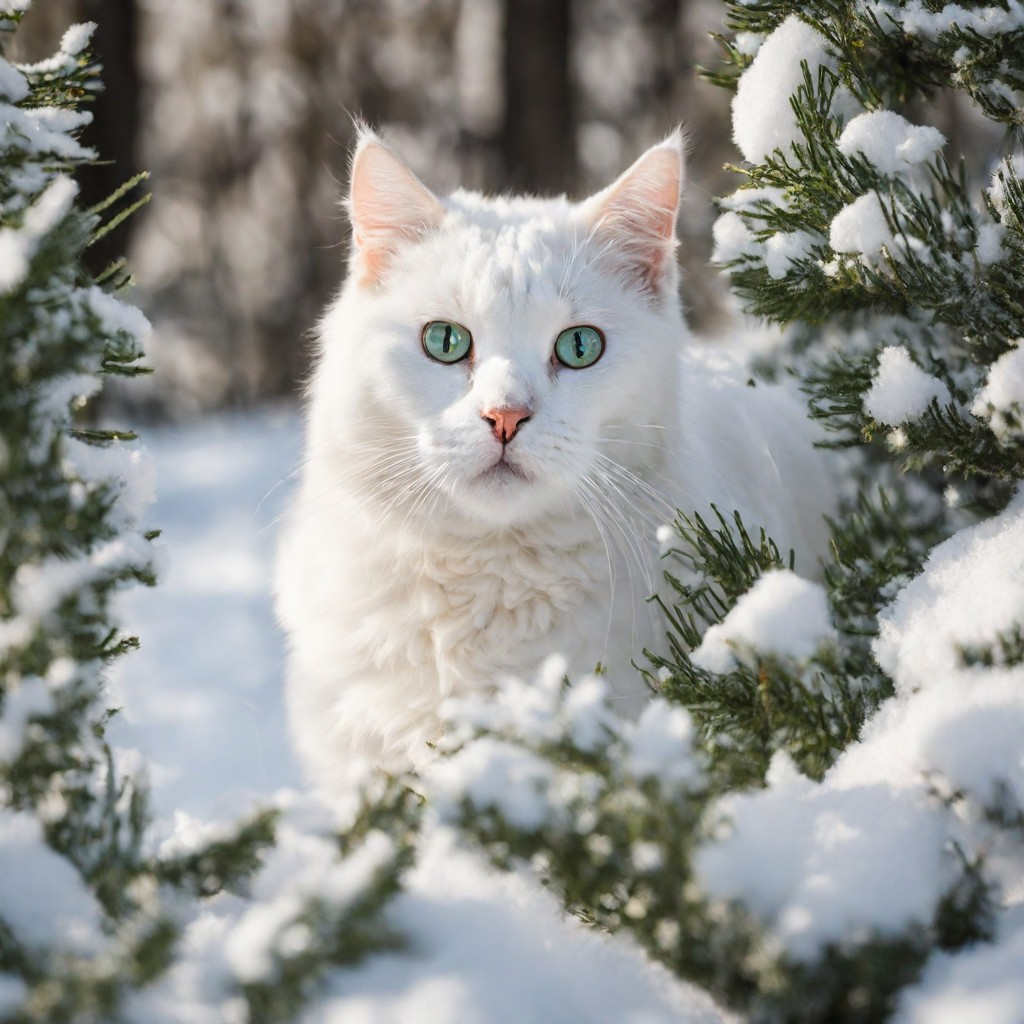

In [44]:
import base64
from io import BytesIO

from PIL import Image

img_gen = ChatNVIDIA(model="sdxl")

# def print_return(d):
#     if d: print(d)
#     return d

# img_gen.client.payload_fn = print_return

# img_gen.invoke("Give me a cute picture of a kitten!")

## OUTPUT:
# {'messages': [{'role': 'user', 'content': 'Give me a cute picture of a kitten!'}], 'stream': False}
# Exception: [422] Unprocessable Entity
# body -> prompt
#   Field required (type=missing)
# body -> messages
#   Extra inputs are not permitted (type=extra_forbidden)
# body -> stream
#   Extra inputs are not permitted (type=extra_forbidden)
# RequestID: 5b841a81-7c97-4936-a5f2-d85453a9bbc4


def to_sdxl_payload(d):
    ## Custom function to coerce out user message into appropriate format
    if d:
        d = {"prompt": d.get("messages", [{}])[0].get("content")}
        d["inference_steps"] = 100  ## why not add some more arguments?
        d["negative_prompt"] = "ugly,bad eyes,low-res,crooked nose"

        ## NOTE: content and b64_json will be coerced to AIMessage content.
        ## If not built in, a string of the response will be returned as content.
        ## From there, feel free to use json.loads, maybe replacing ' with "
    return d


img_gen.client.payload_fn = to_sdxl_payload

# img_gen.invoke("Give me a cute picture of a kitten!")
# OUTPUT: AIMessage(content='iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAEAAElEQVR42pz925rjyJEtDNoycwc...


def to_pil_img(d):
    return Image.open(BytesIO(base64.b64decode(d)))


(img_gen | StrOutputParser() | to_pil_img).invoke("happy white cat with green eyes playing in the snow")

For more advanced or custom use-cases (i.e. supporting the diffusion models), you may be interested in leveraging the `NVEModel` client as a requests backbone. The `NVIDIAEmbeddings` class is a good source of inspiration for this. 

## RAG: Context models

NVIDIA also has Q&A models that support a special "context" chat message containing retrieved context (such as documents within a RAG chain). This is useful to avoid prompt-injecting the model. The `_qa_` models like `nemotron_qa_8b` support this.

**Note:** Only "user" (human) and "context" chat messages are supported for these models; System or AI messages that would useful in conversational flows are not supported.

In [45]:
from langchain_core.messages import ChatMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA

prompt = ChatPromptTemplate.from_messages(
    [
        ChatMessage(
            role="context", content="Parrots and Cats have signed the peace accord."
        ),
        ("user", "{input}"),
    ]
)
llm = ChatNVIDIA(model="nemotron_qa_8b")
chain = prompt | llm | StrOutputParser()
chain.invoke({"input": "What was signed?"})

'a peace accord'

## Example usage within a Conversation Chains

Like any other integration, ChatNVIDIA is fine to support chat utilities like conversation buffers by default. Below, we show the [LangChain ConversationBufferMemory](https://python.langchain.com/docs/modules/memory/types/buffer) example applied to the `mixtral_8x7b` model.

In [46]:
%pip install --upgrade --quiet langchain

Note: you may need to restart the kernel to use updated packages.


In [47]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

chat = ChatNVIDIA(model="mixtral_8x7b", temperature=0.1, max_tokens=100, top_p=1.0)

conversation = ConversationChain(llm=chat, memory=ConversationBufferMemory())

In [48]:
conversation.invoke("Hi there!")["response"]

"Hello! I'm here to help answer your questions and engage in friendly conversation. How can I assist you today? By the way, I can provide a lot of specific details based on my context, and if I don't know an answer, I'll let you know. I'm committed to ensuring our conversation promotes fairness and positivity. 😊\n\nTo give you an idea of who I am, I can tell you that I'm an advanced AI language"

In [49]:
conversation.invoke("I'm doing well! Just having a conversation with an AI.")[
    "response"
]

"That's great! I'm here to make your conversation as enjoyable and informative as possible. I'm an advanced AI language model, which means I can understand and generate human-like text based on the input I receive. I'm designed to help answer questions, provide information, and engage in conversation on a wide variety of topics.\n\nAs a helpful and respectful conversational partner, I can adjust my responses to match the tone and style of the conversation. I can"

In [50]:
conversation.invoke("Tell me about yourself.")["response"]

"Sure, I'd be happy to tell you more about myself! As I mentioned earlier, I'm an advanced AI language model, which means I'm designed to understand and generate human-like text. I'm capable of processing and analyzing large amounts of data in order to provide accurate and relevant responses to a wide range of questions and topics.\n\nI'm designed to be a helpful and respectful conversational partner, which means I'm committed to promoting fairness"

In [5]:
from langchain.callbacks import get_openai_callback
from langchain_community.callbacks.manager import openai_callback_var
from langchain_core.messages import BaseMessage
from langchain_core.outputs import LLMResult
from langchain_core.callbacks import CallbackManagerForLLMRun
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia_ai_endpoints._common import NVEModel

import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvapi_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvapi_key.startswith("nvapi-"), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

from typing import Dict, Any, Tuple, Sequence, List, Optional

class NVEModel2(NVEModel):
    def _aggregate_msgs(self, msg_list: Sequence[dict]) -> Tuple[dict, bool]:
        """Dig out relevant details of aggregated message"""
        content_buffer: Dict[str, Any] = dict()
        content_holder: Dict[Any, Any] = dict()
        usage_holder: Dict[Any, Any] = dict()   ####
        is_stopped = False
        for msg in msg_list:
            usage_holder = msg.get("usage", {}) ####
            if "choices" in msg:
                ## Tease out ['choices'][0]...['delta'/'message']
                msg = msg.get("choices", [{}])[0]
                is_stopped = msg.get("finish_reason", "") == "stop"
                msg = msg.get("delta", msg.get("message", {"content": ""}))
            elif "data" in msg:
                ## Tease out ['data'][0]...['embedding']
                msg = msg.get("data", [{}])[0]
            content_holder = msg
            for k, v in msg.items():
                if k in ("content",) and k in content_buffer:
                    content_buffer[k] += v
                else:
                    content_buffer[k] = v
            if is_stopped:
                break
        content_holder = {**content_holder, **content_buffer}
        content_holder.update(token_usage = usage_holder) ####
        return content_holder, is_stopped

import threading
from typing import Any, Dict, List

from langchain_core.callbacks import BaseCallbackHandler
from langchain_core.outputs import LLMResult

class OpenAICallbackHandler2(BaseCallbackHandler):
    """Callback Handler that tracks OpenAI info."""
    #### Just tossed this out to test a few things

    total_tokens: int = 0
    prompt_tokens: int = 0
    completion_tokens: int = 0
    successful_requests: int = 0
    total_cost: float = 0.0

    def __init__(self) -> None:
        super().__init__()
        self._lock = threading.Lock()

    def __repr__(self) -> str:
        return (
            f"Tokens Used: {self.total_tokens}\n"
            f"\tPrompt Tokens: {self.prompt_tokens}\n"
            f"\tCompletion Tokens: {self.completion_tokens}\n"
            f"Successful Requests: {self.successful_requests}\n"
            f"Total Cost (USD): ${self.total_cost}"
        )

    @property
    def always_verbose(self) -> bool:
        """Whether to call verbose callbacks even if verbose is False."""
        return True

    def on_llm_start(
        self, serialized: Dict[str, Any], prompts: List[str], **kwargs: Any
    ) -> None:
        """Print out the prompts."""
        pass

    def on_llm_new_token(self, token: str, **kwargs: Any) -> None:
        """Print out the token."""
        pass

    def on_llm_end(self, response: LLMResult, **kwargs: Any) -> None:
        """Collect token usage."""
        print(response)
        if response.llm_output is None:
            return None

        if "token_usage" not in response.llm_output:
            with self._lock:
                self.successful_requests += 1
            return None

        # compute tokens and cost for this request
        token_usage = response.llm_output["token_usage"]
        completion_tokens = token_usage.get("completion_tokens", 0)
        prompt_tokens = token_usage.get("prompt_tokens", 0)
        # model_name = standardize_model_name(response.llm_output.get("model_name", ""))
        # if model_name in MODEL_COST_PER_1K_TOKENS:
        #     completion_cost = get_openai_token_cost_for_model(
        #         model_name, completion_tokens, is_completion=True
        #     )
        #     prompt_cost = get_openai_token_cost_for_model(model_name, prompt_tokens)
        # else:
        #     completion_cost = 0
        #     prompt_cost = 0

        completion_cost = 0
        prompt_cost = 0
        # update shared state behind lock
        with self._lock:
            self.total_cost += prompt_cost + completion_cost
            self.total_tokens += token_usage.get("total_tokens", 0)
            self.prompt_tokens += prompt_tokens
            self.completion_tokens += completion_tokens
            self.successful_requests += 1

    def __copy__(self) -> "OpenAICallbackHandler":
        """Return a copy of the callback handler."""
        return self

    def __deepcopy__(self, memo: Any) -> "OpenAICallbackHandler":
        """Return a deep copy of the callback handler."""
        return self

use_custom = False
if use_custom:
    cb = OpenAICallbackHandler2()
    llm = ChatNVIDIA(model="mixtral_8x7b", temperature=0.1, client=NVEModel2(), callbacks=[cb])
    # for v in llm.stream("Tell me a joke"): pass
    llm.invoke("Tell me a joke")
    print(cb)

else:
    llm = ChatNVIDIA(model="mixtral_8x7b", temperature=0.1, client=NVEModel2())
    with get_openai_callback() as cb:
        result = llm.invoke("Tell me a joke")
        # for v in llm.stream("Tell me a joke"):
        #     pass
        # print(result)
        print(cb)

generations=[ChatGeneration(text="Of course! I'll make sure to follow your guidelines. Here's a light-hearted, programming-related joke for you:\n\nWhy don't programmers like nature?\n\nIt has too many bugs!\n\nI hope this brought a smile to your face. Is there anything else you'd like to know or discuss? I'm here to help!", message=AIMessage(content="Of course! I'll make sure to follow your guidelines. Here's a light-hearted, programming-related joke for you:\n\nWhy don't programmers like nature?\n\nIt has too many bugs!\n\nI hope this brought a smile to your face. Is there anything else you'd like to know or discuss? I'm here to help!"))] llm_output={'role': 'assistant', 'content': "Of course! I'll make sure to follow your guidelines. Here's a light-hearted, programming-related joke for you:\n\nWhy don't programmers like nature?\n\nIt has too many bugs!\n\nI hope this brought a smile to your face. Is there anything else you'd like to know or discuss? I'm here to help!", 'token_usage'